# Description

Runs k-means on the umap version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 20000

## Input data

In [6]:
INPUT_SUBSET = "umap"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

## Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10

display(CLUSTERING_OPTIONS)

{'K_MIN': 2, 'K_MAX': 60, 'N_REPS_PER_K': 5, 'KMEANS_N_INIT': 10}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = KMeans(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('KMeans #0', KMeans(n_clusters=2, random_state=20000))

('KMeans #1', KMeans(n_clusters=2, random_state=20001))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'KMeans'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3749, 50)

In [20]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,11.531590,10.773390,10.551500,5.689103,12.646474,8.795625,2.365859,-3.382425,1.458605,14.236823,...,2.214731,9.304909,3.359118,5.211676,1.265622,2.058685,1.291174,1.565621,7.317275,9.037535
100002_raw-Energy,11.554761,10.753816,10.548004,5.710800,12.674987,8.787647,2.379787,-3.339913,1.442655,14.196218,...,2.237087,9.270699,3.383440,5.185328,1.257113,2.057439,1.290686,1.557209,7.297037,9.009866
100003_raw-Protein,11.519615,10.786408,10.540249,5.687959,12.628188,8.789925,2.368370,-3.390937,1.464806,14.233623,...,2.216162,9.314158,3.350708,5.226166,1.267382,2.051692,1.305047,1.558942,7.307035,9.042575
100004_raw-Fat,11.515584,10.756584,10.570711,5.697041,12.661936,8.787330,2.396913,-3.351611,1.435632,14.221588,...,2.214707,9.273252,3.383349,5.220068,1.270067,2.065669,1.281447,1.578588,7.332527,9.005523
100005_raw-Carbohydrate,11.528723,10.762026,10.566773,5.698555,12.671127,8.791903,2.394764,-3.354370,1.442259,14.226301,...,2.216362,9.275563,3.383139,5.216354,1.269187,2.063429,1.280020,1.577227,7.335059,9.009464


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensemble import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:00<00:36,  7.99it/s]

  1%|▏         | 4/295 [00:00<00:28, 10.07it/s]

  2%|▏         | 6/295 [00:00<00:25, 11.55it/s]

  3%|▎         | 8/295 [00:00<00:22, 12.59it/s]

  3%|▎         | 10/295 [00:01<00:45,  6.31it/s]

  4%|▍         | 12/295 [00:01<00:41,  6.80it/s]

  5%|▍         | 14/295 [00:01<00:44,  6.29it/s]

  5%|▌         | 15/295 [00:01<00:42,  6.58it/s]

  5%|▌         | 16/295 [00:02<01:14,  3.73it/s]

  6%|▌         | 17/295 [00:02<01:33,  2.98it/s]

  6%|▌         | 18/295 [00:03<01:20,  3.45it/s]

  6%|▋         | 19/295 [00:03<01:21,  3.39it/s]

  7%|▋         | 20/295 [00:03<01:08,  4.02it/s]

  7%|▋         | 21/295 [00:04<01:29,  3.08it/s]

  7%|▋         | 22/295 [00:04<01:16,  3.59it/s]

  8%|▊         | 23/295 [00:04<01:15,  3.59it/s]

  8%|▊         | 24/295 [00:05<01:51,  2.44it/s]

  8%|▊         | 25/295 [00:05<01:32,  2.93it/s]

  9%|▉         | 26/295 [00:05<01:34,  2.85it/s]

  9%|▉         | 27/295 [00:06<01:43,  2.59it/s]

  9%|▉         | 28/295 [00:06<01:36,  2.76it/s]

 10%|▉         | 29/295 [00:06<01:40,  2.64it/s]

 10%|█         | 30/295 [00:07<01:41,  2.61it/s]

 11%|█         | 31/295 [00:07<01:54,  2.30it/s]

 11%|█         | 32/295 [00:08<01:51,  2.37it/s]

 11%|█         | 33/295 [00:09<02:18,  1.90it/s]

 12%|█▏        | 34/295 [00:09<02:13,  1.96it/s]

 12%|█▏        | 35/295 [00:10<02:08,  2.02it/s]

 12%|█▏        | 36/295 [00:10<01:57,  2.21it/s]

 13%|█▎        | 37/295 [00:11<02:09,  1.99it/s]

 13%|█▎        | 38/295 [00:11<02:14,  1.92it/s]

 13%|█▎        | 39/295 [00:11<02:05,  2.04it/s]

 14%|█▎        | 40/295 [00:12<01:53,  2.24it/s]

 14%|█▍        | 41/295 [00:12<01:51,  2.28it/s]

 14%|█▍        | 42/295 [00:13<02:12,  1.90it/s]

 15%|█▍        | 43/295 [00:13<02:01,  2.07it/s]

 15%|█▍        | 44/295 [00:14<01:52,  2.23it/s]

 15%|█▌        | 45/295 [00:15<02:20,  1.78it/s]

 16%|█▌        | 46/295 [00:15<02:13,  1.87it/s]

 16%|█▌        | 47/295 [00:15<02:01,  2.05it/s]

 16%|█▋        | 48/295 [00:16<02:22,  1.74it/s]

 17%|█▋        | 49/295 [00:17<02:05,  1.96it/s]

 17%|█▋        | 50/295 [00:17<02:12,  1.84it/s]

 17%|█▋        | 51/295 [00:18<02:16,  1.79it/s]

 18%|█▊        | 52/295 [00:18<02:24,  1.69it/s]

 18%|█▊        | 53/295 [00:19<02:35,  1.56it/s]

 18%|█▊        | 54/295 [00:20<03:02,  1.32it/s]

 19%|█▊        | 55/295 [00:21<02:58,  1.34it/s]

 19%|█▉        | 56/295 [00:22<03:13,  1.24it/s]

 19%|█▉        | 57/295 [00:23<03:32,  1.12it/s]

 20%|█▉        | 58/295 [00:24<03:47,  1.04it/s]

 20%|██        | 59/295 [00:25<03:53,  1.01it/s]

 20%|██        | 60/295 [00:26<03:43,  1.05it/s]

 21%|██        | 61/295 [00:27<03:47,  1.03it/s]

 21%|██        | 62/295 [00:28<03:51,  1.01it/s]

 21%|██▏       | 63/295 [00:29<03:57,  1.02s/it]

 22%|██▏       | 64/295 [00:30<03:45,  1.02it/s]

 22%|██▏       | 65/295 [00:31<03:49,  1.00it/s]

 22%|██▏       | 66/295 [00:32<03:52,  1.01s/it]

 23%|██▎       | 67/295 [00:33<03:56,  1.04s/it]

 23%|██▎       | 68/295 [00:34<04:01,  1.06s/it]

 23%|██▎       | 69/295 [00:35<04:02,  1.07s/it]

 24%|██▎       | 70/295 [00:37<04:01,  1.07s/it]

 24%|██▍       | 71/295 [00:38<04:04,  1.09s/it]

 24%|██▍       | 72/295 [00:39<04:04,  1.10s/it]

 25%|██▍       | 73/295 [00:40<04:00,  1.08s/it]

 25%|██▌       | 74/295 [00:41<04:01,  1.09s/it]

 25%|██▌       | 75/295 [00:42<03:58,  1.09s/it]

 26%|██▌       | 76/295 [00:43<03:56,  1.08s/it]

 26%|██▌       | 77/295 [00:44<03:55,  1.08s/it]

 26%|██▋       | 78/295 [00:45<03:53,  1.08s/it]

 27%|██▋       | 79/295 [00:46<03:45,  1.05s/it]

 27%|██▋       | 80/295 [00:47<03:46,  1.05s/it]

 27%|██▋       | 81/295 [00:48<03:50,  1.08s/it]

 28%|██▊       | 82/295 [00:50<03:52,  1.09s/it]

 28%|██▊       | 83/295 [00:51<03:53,  1.10s/it]

 28%|██▊       | 84/295 [00:52<03:52,  1.10s/it]

 29%|██▉       | 85/295 [00:53<03:52,  1.11s/it]

 29%|██▉       | 86/295 [00:54<03:49,  1.10s/it]

 29%|██▉       | 87/295 [00:55<03:52,  1.12s/it]

 30%|██▉       | 88/295 [00:56<03:47,  1.10s/it]

 30%|███       | 89/295 [00:57<03:49,  1.11s/it]

 31%|███       | 90/295 [00:58<03:46,  1.10s/it]

 31%|███       | 91/295 [01:00<03:45,  1.11s/it]

 31%|███       | 92/295 [01:01<03:42,  1.10s/it]

 32%|███▏      | 93/295 [01:02<03:41,  1.10s/it]

 32%|███▏      | 94/295 [01:03<03:43,  1.11s/it]

 32%|███▏      | 95/295 [01:04<03:44,  1.12s/it]

 33%|███▎      | 96/295 [01:05<03:56,  1.19s/it]

 33%|███▎      | 97/295 [01:07<04:03,  1.23s/it]

 33%|███▎      | 98/295 [01:08<04:11,  1.27s/it]

 34%|███▎      | 99/295 [01:09<04:13,  1.29s/it]

 34%|███▍      | 100/295 [01:11<04:13,  1.30s/it]

 34%|███▍      | 101/295 [01:12<04:16,  1.32s/it]

 35%|███▍      | 102/295 [01:13<04:19,  1.35s/it]

 35%|███▍      | 103/295 [01:15<04:19,  1.35s/it]

 35%|███▌      | 104/295 [01:16<04:15,  1.34s/it]

 36%|███▌      | 105/295 [01:17<04:15,  1.34s/it]

 36%|███▌      | 106/295 [01:19<04:16,  1.35s/it]

 36%|███▋      | 107/295 [01:20<04:15,  1.36s/it]

 37%|███▋      | 108/295 [01:22<04:13,  1.36s/it]

 37%|███▋      | 109/295 [01:23<04:14,  1.37s/it]

 37%|███▋      | 110/295 [01:24<04:11,  1.36s/it]

 38%|███▊      | 111/295 [01:26<04:10,  1.36s/it]

 38%|███▊      | 112/295 [01:27<04:09,  1.36s/it]

 38%|███▊      | 113/295 [01:28<04:10,  1.38s/it]

 39%|███▊      | 114/295 [01:30<04:10,  1.38s/it]

 39%|███▉      | 115/295 [01:31<04:08,  1.38s/it]

 39%|███▉      | 116/295 [01:33<04:09,  1.39s/it]

 40%|███▉      | 117/295 [01:34<04:06,  1.38s/it]

 40%|████      | 118/295 [01:35<04:06,  1.39s/it]

 40%|████      | 119/295 [01:37<04:06,  1.40s/it]

 41%|████      | 120/295 [01:38<04:04,  1.40s/it]

 41%|████      | 121/295 [01:40<04:00,  1.38s/it]

 41%|████▏     | 122/295 [01:41<03:57,  1.37s/it]

 42%|████▏     | 123/295 [01:42<03:56,  1.38s/it]

 42%|████▏     | 124/295 [01:44<03:54,  1.37s/it]

 42%|████▏     | 125/295 [01:45<03:51,  1.36s/it]

 43%|████▎     | 126/295 [01:46<03:55,  1.39s/it]

 43%|████▎     | 127/295 [01:48<03:53,  1.39s/it]

 43%|████▎     | 128/295 [01:49<03:52,  1.39s/it]

 44%|████▎     | 129/295 [01:51<03:52,  1.40s/it]

 44%|████▍     | 130/295 [01:52<03:51,  1.40s/it]

 44%|████▍     | 131/295 [01:54<03:54,  1.43s/it]

 45%|████▍     | 132/295 [01:55<03:51,  1.42s/it]

 45%|████▌     | 133/295 [01:56<03:49,  1.42s/it]

 45%|████▌     | 134/295 [01:58<03:47,  1.42s/it]

 46%|████▌     | 135/295 [01:59<03:46,  1.41s/it]

 46%|████▌     | 136/295 [02:01<03:44,  1.41s/it]

 46%|████▋     | 137/295 [02:02<03:44,  1.42s/it]

 47%|████▋     | 138/295 [02:04<03:44,  1.43s/it]

 47%|████▋     | 139/295 [02:05<03:43,  1.43s/it]

 47%|████▋     | 140/295 [02:06<03:41,  1.43s/it]

 48%|████▊     | 141/295 [02:08<03:40,  1.43s/it]

 48%|████▊     | 142/295 [02:09<03:40,  1.44s/it]

 48%|████▊     | 143/295 [02:11<03:40,  1.45s/it]

 49%|████▉     | 144/295 [02:12<03:37,  1.44s/it]

 49%|████▉     | 145/295 [02:14<03:36,  1.44s/it]

 49%|████▉     | 146/295 [02:15<03:33,  1.43s/it]

 50%|████▉     | 147/295 [02:17<03:35,  1.45s/it]

 50%|█████     | 148/295 [02:18<03:34,  1.46s/it]

 51%|█████     | 149/295 [02:19<03:34,  1.47s/it]

 51%|█████     | 150/295 [02:21<03:31,  1.46s/it]

 51%|█████     | 151/295 [02:22<03:29,  1.45s/it]

 52%|█████▏    | 152/295 [02:24<03:27,  1.45s/it]

 52%|█████▏    | 153/295 [02:25<03:25,  1.45s/it]

 52%|█████▏    | 154/295 [02:27<03:24,  1.45s/it]

 53%|█████▎    | 155/295 [02:28<03:22,  1.45s/it]

 53%|█████▎    | 156/295 [02:30<03:23,  1.46s/it]

 53%|█████▎    | 157/295 [02:31<03:21,  1.46s/it]

 54%|█████▎    | 158/295 [02:33<03:22,  1.48s/it]

 54%|█████▍    | 159/295 [02:34<03:20,  1.47s/it]

 54%|█████▍    | 160/295 [02:36<03:19,  1.47s/it]

 55%|█████▍    | 161/295 [02:37<03:16,  1.47s/it]

 55%|█████▍    | 162/295 [02:38<03:15,  1.47s/it]

 55%|█████▌    | 163/295 [02:40<03:13,  1.47s/it]

 56%|█████▌    | 164/295 [02:41<03:12,  1.47s/it]

 56%|█████▌    | 165/295 [02:43<03:11,  1.47s/it]

 56%|█████▋    | 166/295 [02:44<03:09,  1.47s/it]

 57%|█████▋    | 167/295 [02:46<03:07,  1.47s/it]

 57%|█████▋    | 168/295 [02:47<03:05,  1.46s/it]

 57%|█████▋    | 169/295 [02:49<03:04,  1.46s/it]

 58%|█████▊    | 170/295 [02:50<03:03,  1.47s/it]

 58%|█████▊    | 171/295 [02:52<03:02,  1.47s/it]

 58%|█████▊    | 172/295 [02:53<03:00,  1.47s/it]

 59%|█████▊    | 173/295 [02:55<02:59,  1.47s/it]

 59%|█████▉    | 174/295 [02:56<02:57,  1.47s/it]

 59%|█████▉    | 175/295 [02:58<02:56,  1.47s/it]

 60%|█████▉    | 176/295 [02:59<02:58,  1.50s/it]

 60%|██████    | 177/295 [03:01<02:55,  1.49s/it]

 60%|██████    | 178/295 [03:02<02:55,  1.50s/it]

 61%|██████    | 179/295 [03:04<02:53,  1.50s/it]

 61%|██████    | 180/295 [03:05<02:51,  1.49s/it]

 61%|██████▏   | 181/295 [03:07<02:50,  1.50s/it]

 62%|██████▏   | 182/295 [03:08<02:49,  1.50s/it]

 62%|██████▏   | 183/295 [03:10<02:50,  1.52s/it]

 62%|██████▏   | 184/295 [03:11<02:46,  1.50s/it]

 63%|██████▎   | 185/295 [03:13<02:45,  1.50s/it]

 63%|██████▎   | 186/295 [03:14<02:44,  1.51s/it]

 63%|██████▎   | 187/295 [03:16<02:41,  1.50s/it]

 64%|██████▎   | 188/295 [03:17<02:41,  1.51s/it]

 64%|██████▍   | 189/295 [03:19<02:39,  1.51s/it]

 64%|██████▍   | 190/295 [03:20<02:39,  1.52s/it]

 65%|██████▍   | 191/295 [03:22<02:37,  1.51s/it]

 65%|██████▌   | 192/295 [03:23<02:36,  1.52s/it]

 65%|██████▌   | 193/295 [03:25<02:35,  1.52s/it]

 66%|██████▌   | 194/295 [03:26<02:34,  1.53s/it]

 66%|██████▌   | 195/295 [03:28<02:33,  1.53s/it]

 66%|██████▋   | 196/295 [03:29<02:31,  1.53s/it]

 67%|██████▋   | 197/295 [03:31<02:29,  1.53s/it]

 67%|██████▋   | 198/295 [03:32<02:29,  1.54s/it]

 67%|██████▋   | 199/295 [03:34<02:27,  1.53s/it]

 68%|██████▊   | 200/295 [03:36<02:26,  1.54s/it]

 68%|██████▊   | 201/295 [03:37<02:25,  1.55s/it]

 68%|██████▊   | 202/295 [03:39<02:23,  1.55s/it]

 69%|██████▉   | 203/295 [03:40<02:22,  1.54s/it]

 69%|██████▉   | 204/295 [03:42<02:22,  1.56s/it]

 69%|██████▉   | 205/295 [03:43<02:19,  1.55s/it]

 70%|██████▉   | 206/295 [03:45<02:17,  1.55s/it]

 70%|███████   | 207/295 [03:46<02:15,  1.54s/it]

 71%|███████   | 208/295 [03:48<02:14,  1.55s/it]

 71%|███████   | 209/295 [03:50<02:13,  1.55s/it]

 71%|███████   | 210/295 [03:51<02:11,  1.55s/it]

 72%|███████▏  | 211/295 [03:53<02:11,  1.56s/it]

 72%|███████▏  | 212/295 [03:54<02:09,  1.56s/it]

 72%|███████▏  | 213/295 [03:56<02:09,  1.58s/it]

 73%|███████▎  | 214/295 [03:57<02:07,  1.57s/it]

 73%|███████▎  | 215/295 [03:59<02:04,  1.56s/it]

 73%|███████▎  | 216/295 [04:01<02:04,  1.58s/it]

 74%|███████▎  | 217/295 [04:02<02:02,  1.57s/it]

 74%|███████▍  | 218/295 [04:04<02:00,  1.57s/it]

 74%|███████▍  | 219/295 [04:05<01:59,  1.57s/it]

 75%|███████▍  | 220/295 [04:07<01:58,  1.58s/it]

 75%|███████▍  | 221/295 [04:09<01:58,  1.60s/it]

 75%|███████▌  | 222/295 [04:10<01:56,  1.60s/it]

 76%|███████▌  | 223/295 [04:12<01:54,  1.58s/it]

 76%|███████▌  | 224/295 [04:13<01:52,  1.58s/it]

 76%|███████▋  | 225/295 [04:15<01:50,  1.58s/it]

 77%|███████▋  | 226/295 [04:16<01:50,  1.60s/it]

 77%|███████▋  | 227/295 [04:18<01:48,  1.60s/it]

 77%|███████▋  | 228/295 [04:20<01:46,  1.59s/it]

 78%|███████▊  | 229/295 [04:21<01:45,  1.60s/it]

 78%|███████▊  | 230/295 [04:23<01:44,  1.61s/it]

 78%|███████▊  | 231/295 [04:25<01:44,  1.63s/it]

 79%|███████▊  | 232/295 [04:26<01:42,  1.62s/it]

 79%|███████▉  | 233/295 [04:28<01:40,  1.62s/it]

 79%|███████▉  | 234/295 [04:29<01:39,  1.64s/it]

 80%|███████▉  | 235/295 [04:31<01:37,  1.63s/it]

 80%|████████  | 236/295 [04:33<01:35,  1.63s/it]

 80%|████████  | 237/295 [04:34<01:34,  1.63s/it]

 81%|████████  | 238/295 [04:36<01:33,  1.63s/it]

 81%|████████  | 239/295 [04:37<01:27,  1.57s/it]

 81%|████████▏ | 240/295 [04:39<01:27,  1.60s/it]

 82%|████████▏ | 241/295 [04:41<01:27,  1.62s/it]

 82%|████████▏ | 242/295 [04:42<01:26,  1.63s/it]

 82%|████████▏ | 243/295 [04:44<01:25,  1.64s/it]

 83%|████████▎ | 244/295 [04:46<01:23,  1.63s/it]

 83%|████████▎ | 245/295 [04:47<01:21,  1.63s/it]

 83%|████████▎ | 246/295 [04:49<01:20,  1.64s/it]

 84%|████████▎ | 247/295 [04:51<01:19,  1.66s/it]

 84%|████████▍ | 248/295 [04:52<01:19,  1.68s/it]

 84%|████████▍ | 249/295 [04:54<01:17,  1.68s/it]

 85%|████████▍ | 250/295 [04:56<01:15,  1.67s/it]

 85%|████████▌ | 251/295 [04:57<01:13,  1.67s/it]

 85%|████████▌ | 252/295 [04:59<01:11,  1.67s/it]

 86%|████████▌ | 253/295 [05:01<01:10,  1.68s/it]

 86%|████████▌ | 254/295 [05:02<01:08,  1.67s/it]

 86%|████████▋ | 255/295 [05:04<01:07,  1.68s/it]

 87%|████████▋ | 256/295 [05:06<01:05,  1.67s/it]

 87%|████████▋ | 257/295 [05:07<01:03,  1.68s/it]

 87%|████████▋ | 258/295 [05:09<01:02,  1.68s/it]

 88%|████████▊ | 259/295 [05:11<01:00,  1.69s/it]

 88%|████████▊ | 260/295 [05:13<00:59,  1.69s/it]

 88%|████████▊ | 261/295 [05:14<00:56,  1.67s/it]

 89%|████████▉ | 262/295 [05:16<00:54,  1.66s/it]

 89%|████████▉ | 263/295 [05:17<00:52,  1.65s/it]

 89%|████████▉ | 264/295 [05:19<00:51,  1.65s/it]

 90%|████████▉ | 265/295 [05:21<00:49,  1.66s/it]

 90%|█████████ | 266/295 [05:22<00:48,  1.67s/it]

 91%|█████████ | 267/295 [05:24<00:47,  1.68s/it]

 91%|█████████ | 268/295 [05:26<00:45,  1.69s/it]

 91%|█████████ | 269/295 [05:28<00:43,  1.69s/it]

 92%|█████████▏| 270/295 [05:29<00:42,  1.71s/it]

 92%|█████████▏| 271/295 [05:31<00:41,  1.71s/it]

 92%|█████████▏| 272/295 [05:33<00:39,  1.71s/it]

 93%|█████████▎| 273/295 [05:34<00:37,  1.70s/it]

 93%|█████████▎| 274/295 [05:36<00:35,  1.71s/it]

 93%|█████████▎| 275/295 [05:38<00:33,  1.70s/it]

 94%|█████████▎| 276/295 [05:40<00:32,  1.69s/it]

 94%|█████████▍| 277/295 [05:41<00:30,  1.71s/it]

 94%|█████████▍| 278/295 [05:43<00:28,  1.70s/it]

 95%|█████████▍| 279/295 [05:45<00:27,  1.70s/it]

 95%|█████████▍| 280/295 [05:46<00:25,  1.70s/it]

 95%|█████████▌| 281/295 [05:48<00:23,  1.70s/it]

 96%|█████████▌| 282/295 [05:50<00:22,  1.71s/it]

 96%|█████████▌| 283/295 [05:51<00:20,  1.72s/it]

 96%|█████████▋| 284/295 [05:53<00:18,  1.73s/it]

 97%|█████████▋| 285/295 [05:55<00:17,  1.73s/it]

 97%|█████████▋| 286/295 [05:57<00:15,  1.72s/it]

 97%|█████████▋| 287/295 [05:58<00:13,  1.73s/it]

 98%|█████████▊| 288/295 [06:00<00:12,  1.72s/it]

 98%|█████████▊| 289/295 [06:02<00:10,  1.72s/it]

 98%|█████████▊| 290/295 [06:04<00:08,  1.73s/it]

 99%|█████████▊| 291/295 [06:05<00:06,  1.74s/it]

 99%|█████████▉| 292/295 [06:07<00:05,  1.74s/it]

 99%|█████████▉| 293/295 [06:09<00:03,  1.73s/it]

100%|█████████▉| 294/295 [06:11<00:01,  1.74s/it]

100%|██████████| 295/295 [06:12<00:00,  1.75s/it]

100%|██████████| 295/295 [06:12<00:00,  1.26s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,4641.627826


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,4641.627826
3,3572.731943
4,2867.380460
5,2336.908511
6,2029.893175
7,1833.296008
8,1647.655485
9,1508.570532
10,1397.682758


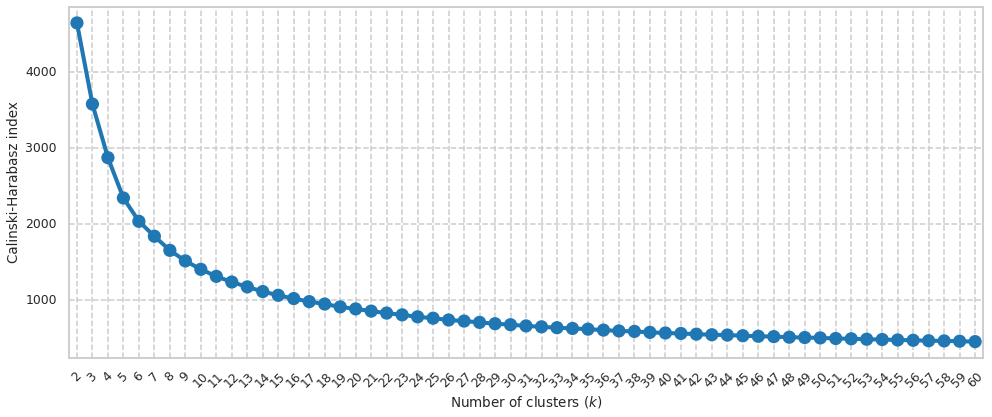

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
3     1.000000
4     1.000000
9     0.712817
13    0.627578
8     0.626027
10    0.620225
5     0.592991
23    0.556429
12    0.542345
18    0.531337
11    0.520030
21    0.518118
59    0.515677
24    0.511090
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.270753,1.000000,0.594495,1.000000,0.270753,0.334166,0.270753,0.594495,1.000000,0.594495
6,0.252984,0.273092,0.250034,0.425033,0.257348,0.303169,0.530985,0.635131,0.229331,0.226609


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-stability-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


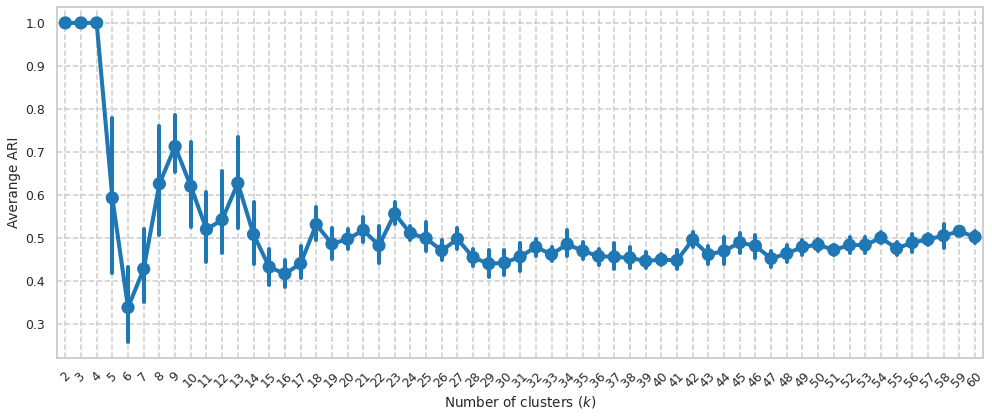

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()